=== EJERCICIO 1: CLASIFICACIÓN BINARIA CON REGULARIZACIÓN ===

PASO 1: Cargando dataset...
Dataset cargado: 400 filas x 5 columnas

Primeras filas:
    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0

Distribución objetivo:
Purchased
0    257
1    143
Name: count, dtype: int64

PASO 2: Limpieza básica...
User ID eliminado
Gender convertido a numérica
Columnas finales: ['Age', 'EstimatedSalary', 'Purchased', 'Gender_Male']

PASO 3: Dividiendo datos...
Entrenamiento: 320 | Prueba: 80

PASO 4: Escalado estándar...

PASO 5: Entrenando modelos...
Modelos entrenados

PASO 6: Evaluando modelos...
AUC-ROC Ridge: 0.970
AUC-ROC Lasso: 0.970

PASO 7: Generando matrices de confusión...
Gráfico guardado: comparacion_modelos.png

=== RESU

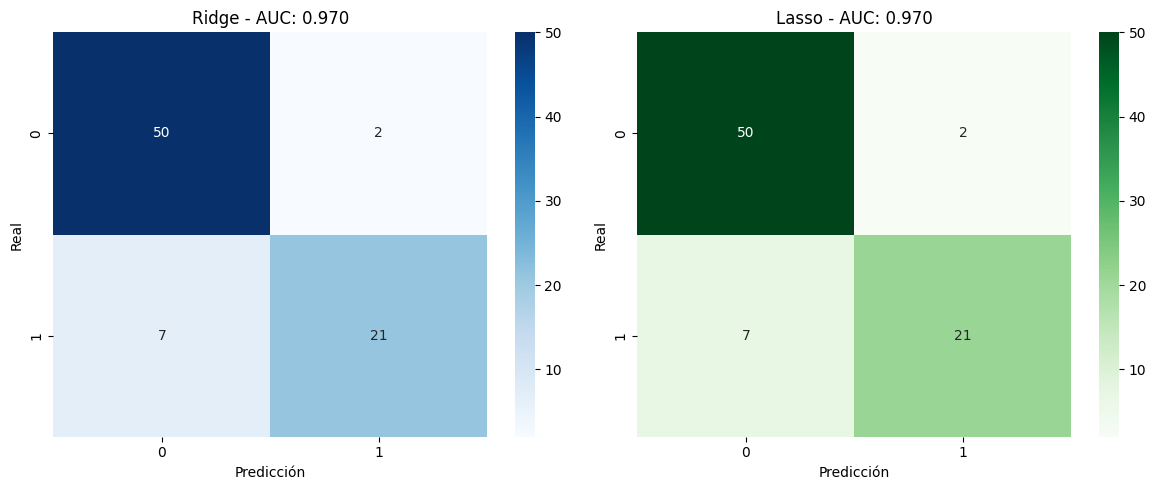

In [1]:
# ==============================================
# EJERCICIO 1: Clasificación Binaria con Regularización (Nivel Fácil)
# Objetivo: Entrenar modelo de regresión logística con Ridge y Lasso
# Dataset: Social Network Ads 
# ==============================================

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_auc_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

print("=== EJERCICIO 1: CLASIFICACIÓN BINARIA CON REGULARIZACIÓN ===\n")

# PASO 1: Carga del dataset
print("PASO 1: Cargando dataset...")
df = pd.read_csv('../../Dataset/Social_Network_Ads.xls')
print(f"Dataset cargado: {df.shape[0]} filas x {df.shape[1]} columnas")

print(f"\nPrimeras filas:")
print(df.head())

print(f"\nDistribución objetivo:")
print(df['Purchased'].value_counts())

# PASO 2: Limpieza básica
print(f"\nPASO 2: Limpieza básica...")

# Eliminar User ID
df = df.drop('User ID', axis=1)
print("User ID eliminado")

# Convertir Gender a numérica
df = pd.get_dummies(df, columns=['Gender'], drop_first=True)
print("Gender convertido a numérica")

print(f"Columnas finales: {list(df.columns)}")

# PASO 3: Dividir datos (80/20)
print(f"\nPASO 3: Dividiendo datos...")
X = df[['Age', 'EstimatedSalary', 'Gender_Male']]
y = df['Purchased']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Entrenamiento: {X_train.shape[0]} | Prueba: {X_test.shape[0]}")

# PASO 4: Escalado
print(f"\nPASO 4: Escalado estándar...")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# PASO 5: Entrenar modelos
print(f"\nPASO 5: Entrenando modelos...")

# Ridge (L2)
model_ridge = LogisticRegression(penalty='l2', C=1.0, random_state=42)
model_ridge.fit(X_train_scaled, y_train)

# Lasso (L1)
model_lasso = LogisticRegression(penalty='l1', C=1.0, solver='liblinear', random_state=42)
model_lasso.fit(X_train_scaled, y_train)

print("Modelos entrenados")

# PASO 6: Predicciones y evaluación
print(f"\nPASO 6: Evaluando modelos...")

# Predicciones
y_pred_ridge = model_ridge.predict(X_test_scaled)
y_pred_lasso = model_lasso.predict(X_test_scaled)

y_proba_ridge = model_ridge.predict_proba(X_test_scaled)[:, 1]
y_proba_lasso = model_lasso.predict_proba(X_test_scaled)[:, 1]

# AUC-ROC
auc_ridge = roc_auc_score(y_test, y_proba_ridge)
auc_lasso = roc_auc_score(y_test, y_proba_lasso)

print(f"AUC-ROC Ridge: {auc_ridge:.3f}")
print(f"AUC-ROC Lasso: {auc_lasso:.3f}")

# PASO 7: Matrices de confusión
print(f"\nPASO 7: Generando matrices de confusión...")

plt.figure(figsize=(12, 5))

# Ridge
plt.subplot(1, 2, 1)
cm_ridge = confusion_matrix(y_test, y_pred_ridge)
sns.heatmap(cm_ridge, annot=True, fmt='d', cmap='Blues')
plt.title(f'Ridge - AUC: {auc_ridge:.3f}')
plt.xlabel('Predicción')
plt.ylabel('Real')

# Lasso
plt.subplot(1, 2, 2)
cm_lasso = confusion_matrix(y_test, y_pred_lasso)
sns.heatmap(cm_lasso, annot=True, fmt='d', cmap='Greens')
plt.title(f'Lasso - AUC: {auc_lasso:.3f}')
plt.xlabel('Predicción')
plt.ylabel('Real')

plt.tight_layout()
plt.savefig('comparacion_modelos.png', dpi=300, bbox_inches='tight')
print("Gráfico guardado: comparacion_modelos.png")

# Resumen final
print(f"\n=== RESUMEN ===")
print(f"Ridge AUC: {auc_ridge:.3f}")
print(f"Lasso AUC: {auc_lasso:.3f}")
print(f"Mejor modelo: {'Ridge' if auc_ridge > auc_lasso else 'Lasso'}")
print(f"\nEJERCICIO COMPLETADO!")